In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving test_churn.csv to test_churn (1).csv
Saving train_churn.csv to train_churn (1).csv


In [ ]:
train_df=pd.read_csv("train_churn.csv")
test_df=pd.read_csv("test_churn.csv")
train_df.columns= train_df.columns.str.lower()
test_df.columns= test_df.columns.str.lower()

In [ ]:
train_df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
all_data=[train_df,test_df]

In [ ]:
def plot(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=train_df,x=feature,ax=axes[0])
    sns.distplot(a=train_df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(12,3)

In [ ]:
def plotc(feature):
    sns.countplot(data=train_df,x=feature)
    ax=sns.countplot(data=train_df,x=feature)

In [ ]:
# calculate summary statistics
age_mean, age_std = train_df.age.mean(), train_df.age.std()
print(age_mean)
print(age_std)
print(train_df['age'].skew())

# identify outliers
cut_off = age_std * 2.5
lower, upper = age_mean - cut_off, age_mean + cut_off
print(lower)
print(upper)
# identify outliers
#outliers = [x for x in data if x < lower or x > upper]
# remove outliers
#outliers_removed = [x for x in data if x > lower and x < upper]

train_df["age"] = np.where(train_df["age"] <lower, lower,train_df['age'])
train_df["age"] = np.where(train_df["age"] >upper, upper,train_df['age'])
print(train_df['age'].skew())

38.937875
10.511223820880774
1.0079543965790647
12.659815447798064
65.21593455220193
0.7355157026256163


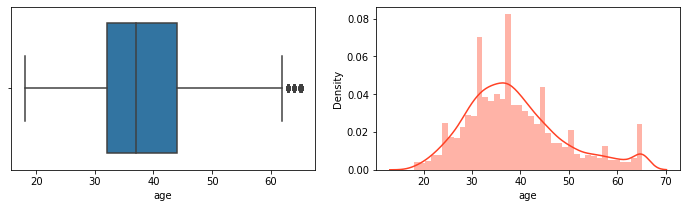

In [ ]:
plot("age")

In [ ]:
for dataset in all_data:
    dataset['age_bin'] = pd.cut(dataset['age'], bins=[0,18,40,100], labels=['young','adult','elder'])

In [ ]:
for dataset in all_data:
    dataset['balance_bin'] = pd.cut(dataset['balance'], bins=[-1,10000,50000,150000,300000], labels=['very_low_balance','low_balance',
                                                                                        'medium_balance','high_balance'])

In [ ]:
for dataset in all_data:
    dataset['salary_bin'] = pd.qcut(dataset['estimatedsalary'], q = 3,labels=['low_salary','medium_salary',
                                                                                        'high_salary'])

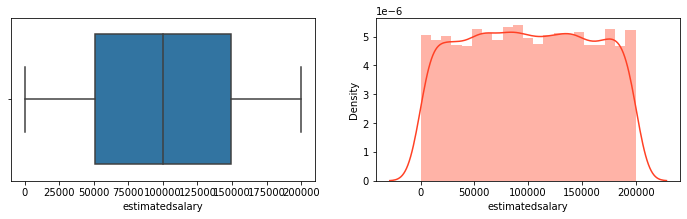

In [ ]:
plot("estimatedsalary")

In [ ]:
train_df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,age_bin,balance_bin,salary_bin
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,elder,very_low_balance,medium_salary
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,elder,medium_balance,medium_salary
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,elder,high_balance,medium_salary
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0,adult,very_low_balance,medium_salary
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,elder,medium_balance,medium_salary


In [ ]:
train_df.salary_bin.value_counts()

high_salary      2667
low_salary       2667
medium_salary    2666
Name: salary_bin, dtype: int64

In [ ]:
train_df = pd.get_dummies(train_df, columns = ["gender","geography","age_bin","balance_bin","salary_bin"],
                             prefix=["gender","geography","age_type","balance_type","salary_type"],drop_first=True)

test_df = pd.get_dummies(test_df, columns = ["gender","geography","age_bin","balance_bin","salary_bin"],
                             prefix=["gender","geography","age_type","balance_type","salary_type"],drop_first=True)

In [ ]:
train_df.head()

,rownumber,customerid,surname,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,gender_Male,geography_Germany,geography_Spain,age_type_adult,age_type_elder,balance_type_low_balance,balance_type_medium_balance,balance_type_high_balance,salary_type_medium_salary,salary_type_high_salary
0,1,15634602,Hargrave,619,42.0,2,0.00,1,1,1,101348.88,1,0,0,0,0,1,0,0,0,1,0
1,2,15647311,Hill,608,41.0,1,83807.86,1,0,1,112542.58,0,0,0,1,0,1,0,1,0,1,0
2,3,15619304,Onio,502,42.0,8,159660.80,3,1,0,113931.57,1,0,0,0,0,1,0,0,1,1,0
3,4,15701354,Boni,699,39.0,1,0.00,2,0,0,93826.63,0,0,0,0,1,0,0,0,0,1,0
4,5,15737888,Mitchell,850,43.0,2,125510.82,1,1,1,79084.10,0,0,0,1,0,1,0,1,0,1,0


In [ ]:
(train_df.columns)

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'age', 'tenure',
       'balance', 'numofproducts', 'hascrcard', 'isactivemember',
       'estimatedsalary', 'exited', 'gender_Male', 'geography_Germany',
       'geography_Spain', 'age_type_adult', 'age_type_elder',
       'balance_type_low_balance', 'balance_type_medium_balance',
       'balance_type_high_balance', 'salary_type_medium_salary',
       'salary_type_high_salary'],
      dtype='object')

In [ ]:
drop_column = ['rownumber', 'customerid', 'surname', 'age', 
       'balance','estimatedsalary']
train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(drop_column, axis=1, inplace = True)


In [ ]:
pd.set_option('display.max_columns', None)
train_df.head()

,creditscore,tenure,numofproducts,hascrcard,isactivemember,exited,gender_Male,geography_Germany,geography_Spain,age_type_adult,age_type_elder,balance_type_low_balance,balance_type_medium_balance,balance_type_high_balance,salary_type_medium_salary,salary_type_high_salary
0,619,2,1,1,1,1,0,0,0,0,1,0,0,0,1,0
1,608,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0
2,502,8,3,1,0,1,0,0,0,0,1,0,0,1,1,0
3,699,1,2,0,0,0,0,0,0,1,0,0,0,0,1,0
4,850,2,1,1,1,0,0,0,1,0,1,0,1,0,1,0


In [ ]:
traindf=train_df
testdf=test_df

traindf.shape,train_df.shape

((8000, 16), (8000, 16))

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix 

In [ ]:
all_features = traindf.drop("exited",axis=1)
Targeted_feature = traindf["exited"]

X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5600, 15), (2400, 15), (5600,), (2400,))

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)

In [ ]:
accuracy = round(accuracy_score(prediction_lr,y_test)*100,2)
print('The accuracy of the Logistic Regression is',accuracy)

The accuracy of the Logistic Regression is 82.12


In [ ]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Logistic REgression is:',round(result_lr.mean()*100,2))

The cross validated score for Logistic REgression is: 81.88


Text(0.5, 1.05, 'Confusion_matrix')

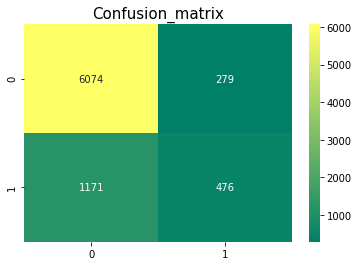

In [ ]:
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
(X_train.columns)

Index(['creditscore', 'tenure', 'numofproducts', 'hascrcard', 'isactivemember',
       'gender_Male', 'geography_Germany', 'geography_Spain', 'age_type_adult',
       'age_type_elder', 'balance_type_low_balance',
       'balance_type_medium_balance', 'balance_type_high_balance',
       'salary_type_medium_salary', 'salary_type_high_salary'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
# m1=sm.Logit(Fiber['active_cust'],Fiber[["income"]+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']])
m1=sm.Logit(train_df['exited'],train_df[['creditscore']+['tenure']+['numofproducts']+['hascrcard']+['isactivemember']+['gender_Male']+['geography_Germany']+['geography_Spain']+['age_type_adult']+['age_type_elder']+['balance_type_low_balance']+['balance_type_medium_balance']+['balance_type_high_balance']+['salary_type_medium_salary']+['salary_type_high_salary']])
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.420407
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.420407
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7985
Method:                           MLE   Df Model:                           14
Date:                Sun, 29 Nov 2020   Pseudo R-squ.:                  0.1731
Time:                        18:33:49   Log-Likelihood:                -3363.3
converged:                       True   LL-Null:                       -4067.5
Covariance Type:            nonrobust   LLR p-value:                2.365e-292
                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

In [ ]:
#logistic regression ka decision tree bana hai
# sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
# plt.title('Confusion_matrix',y=1.05, size=15)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtreemodel= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto', max_depth= 4)
dtreemodel.fit(X_train,y_train)
dtree_prediction_tree=dtreemodel.predict(X_test)

In [ ]:
print('The accuracy of the DecisionTree Classifier is',round(accuracy_score(dtree_prediction_tree,y_test)*100,2))

The accuracy of the DecisionTree Classifier is 81.88


In [ ]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_tree=cross_val_score(dtreemodel,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Decision Tree classifier is:',round(result_tree.mean()*100,2))

The cross validated score for Decision Tree classifier is: 81.74


Text(0.5, 1.05, 'Confusion_matrix')

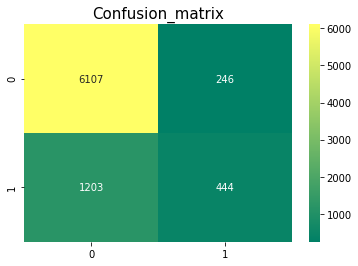

In [ ]:
y_pred = cross_val_predict(dtreemodel,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix',y=1.05, size=15)

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(criterion='gini', n_estimators=500,
                             min_samples_split=10,min_samples_leaf=1,max_depth=4)

In [ ]:
rfmodel.fit(X_train,y_train)
rfprediction_rm=rfmodel.predict(X_test)
accuracy = round(accuracy_score(rfprediction_rm,y_test)*100,2)
print('The accuracy of the Random Forest Classifier is',accuracy)

The accuracy of the Random Forest Classifier is 82.96


In [ ]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(rfmodel,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))

The cross validated score for Random Forest Classifier is: 82.71


Text(0.5, 1.05, 'Confusion_matrix_RF')

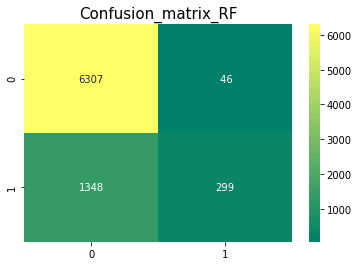

In [ ]:
y_pred = cross_val_predict(rfmodel,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix_RF', y=1.05, size=15)

## Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model= AdaBoostClassifier(n_estimators=1000)
ada_model.fit(X_train,y_train)
prediction_adb=ada_model.predict(X_test)

In [ ]:
print('The accuracy of the AdaBoostClassifier is',round(accuracy_score(prediction_adb,y_test)*100,2))

The accuracy of the AdaBoostClassifier is 84.75


In [ ]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_adb=cross_val_score(ada_model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_adb.mean()*100,2))

The cross validated score for AdaBoostClassifier is: 84.29


In [ ]:
from sklearn.metrics import f1_score
boost_predict_test=model.predict(X_test)
accuracy_test=f1_score(y_test, boost_predict_test, average='micro') 
print("test accuracy", accuracy_test)

test accuracy 0.82125


Text(0.5, 1.05, 'Confusion_matrix_ADA')

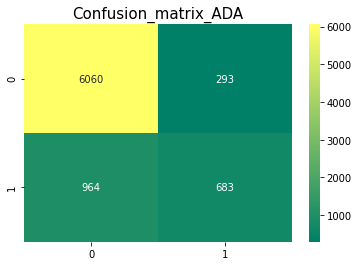

In [ ]:
y_pred = cross_val_predict(ada_model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix_ADA', y=1.05, size=15)

## Gradient Decent

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gd_model= GradientBoostingClassifier()
gd_model.fit(X_train,y_train)
prediction_gbc=gd_model.predict(X_test)

In [ ]:
print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc,y_test)*100,2))

The accuracy of the Gradient Boosting Classifier is 85.83


In [ ]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_gbc=cross_val_score(gd_model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting Classifier is:',round(result_gbc.mean()*100,2))

The cross validated score for Gradient Boosting Classifier is: 85.35


Text(0.5, 1.05, 'Confusion_matrix_GD')

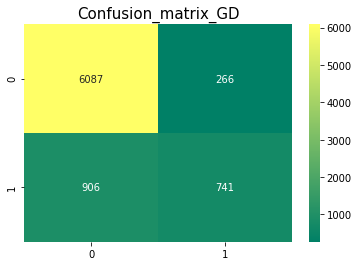

In [ ]:
y_pred = cross_val_predict(gd_model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix_GD', y=1.05, size=15)

##  XG Boost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=4,learning_rate=0.01,n_estimators=100,verbosity=1,n_jobs=1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
prediction_xgb=xgb.predict(X_test)
accuracy = round(accuracy_score(prediction_xgb,y_test)*100,2)
print('The accuracy of the XG Boost is',accuracy)

The accuracy of the XG Boost is 85.17


In [ ]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(xgb,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for XG Boost is:',round(result_rm.mean()*100,2))

The cross validated score for XG Boost is: 84.76


Text(0.5, 1.05, 'Confusion_matrix_XGB')

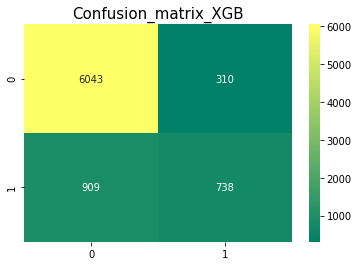

In [ ]:
y_pred = cross_val_predict(xgb,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix_XGB', y=1.05, size=15)

In [ ]:
models = pd.DataFrame({
    'Model': ["LR", 'Random Forest', 'Ada Boost','Gradient Decent','Decision Tree'],
    'Score': [result_lr.mean(),  
              result_rm.mean(),  result_adb.mean(), 
              result_gbc.mean(), result_tree.mean()]})

In [ ]:
models

,Model,Score
0,LR,0.818750
1,Random Forest,0.847625
2,Ada Boost,0.842875
3,Gradient Decent,0.853500
4,Decision Tree,0.817375


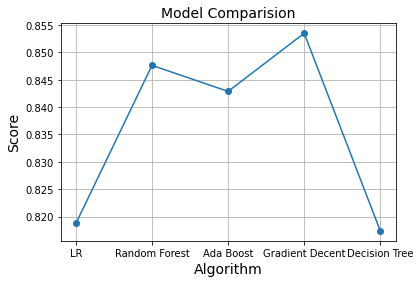

In [ ]:
plt.plot(models["Model"], models['Score'], marker='o')
plt.title('Model Comparision', fontsize=14)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.05, 0.01,0.001],
              'max_depth': [3,4, 5],
              'min_samples_leaf': [100,150],
              'max_features': [4,5] 
              }

In [ ]:
 modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
 modelf.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.4min


KeyboardInterrupt: ignored

In [ ]:
modelf.best_score_

In [ ]:
modelf.best_estimator_

In [ ]:
gdmodel= GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=5,
                           max_features=5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=150, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gdmodel.fit(X_train,y_train)
prediction_gbc=gdmodel.predict(X_test)

In [ ]:
print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc,y_test)*100,2))

In [ ]:
traindf=train_df
testdf=test_df

In [ ]:
train_X = traindf.drop("exited", axis = 1)
train_Y = traindf["exited"]
test_X = testdf.drop("exited", axis=1).copy()
test_Y = testdf[['exited']]
train_X.shape, train_Y.shape, test_X.shape, train_Y.shape

((8000, 15), (8000,), (2000, 15), (8000,))

In [ ]:
gdmodel= GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=5,
                           max_features=5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=150, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gdmodel.fit(train_X,train_Y)
testprediction_gbc=gd_model.predict(test_X)

In [ ]:
print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(testprediction_gbc,test_Y)*100,2))

The accuracy of the Gradient Boosting Classifier is 84.75


In [ ]:

import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [ ]:
vif_cal(input_data=traindf, dependent_col="exited")

creditscore  VIF =  1.0
tenure  VIF =  1.0
numofproducts  VIF =  1.15
hascrcard  VIF =  1.0
isactivemember  VIF =  1.0
gender_Male  VIF =  1.0
geography_Germany  VIF =  1.4
geography_Spain  VIF =  1.13
age_type_adult  VIF =  132.85
age_type_elder  VIF =  132.88
balance_type_low_balance  VIF =  1.02
balance_type_medium_balance  VIF =  1.63
balance_type_high_balance  VIF =  1.27
salary_type_medium_salary  VIF =  1.34
salary_type_high_salary  VIF =  1.34
